In [ ]:
# ==========================================================¶
# Date : 06 dec. 2018
# MS Valdom > didier le picaut
# version = 1.0
# ==========================================================

In [1]:
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import folium
from mpl_toolkits.basemap import Basemap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv("/home/lepic/Desktop/2000pts.txt");
df = pd.read_table("/home/lepic/Desktop/2000pts.txt",sep = ',',header = 0)

In [3]:
print(df.head())

         'c1'       'c2'       'c3'      'c4'     'c5'      'c6'  Unnamed: 6
0  43°34′09″N  43.569076  1°21′11″E  1.352986   8.3469  241.733°         NaN
1  43°27′06″N  43.451715  1°23′07″E  1.385186  17.6640  195.653°         NaN
2  43°22′02″N  43.367203  1°18′00″E  1.299880  28.8648  203.848°         NaN
3  43°37′08″N  43.618861  1°08′03″E  1.134229  25.0130   273.73°         NaN
4  43°36′29″N  43.608095  1°18′55″E  1.315415  10.3799  272.159°         NaN


In [4]:
gps=df.iloc[:,[1,3]]

In [5]:
print(gps.head())

        'c2'      'c4'
0  43.569076  1.352986
1  43.451715  1.385186
2  43.367203  1.299880
3  43.618861  1.134229
4  43.608095  1.315415


In [6]:
print(gps.describe())

              'c2'         'c4'
count  2000.000000  2000.000000
mean     43.605252     1.444301
std       0.137073     0.189526
min      43.337149     1.077350
25%      43.488933     1.283279
50%      43.608831     1.446595
75%      43.715749     1.601727
max      43.873980     1.814144


In [7]:
# centrage-reduction
#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

#transformation – centrage-réduction
z = sc.fit_transform(gps)

In [8]:
z

array([[-0.26398665, -0.48192736],
       [-1.12039394, -0.31198539],
       [-1.73709784, -0.76220037],
       ...,
       [-0.84384136, -0.38046737],
       [ 0.52867515,  1.02591741],
       [ 1.71027469, -0.14655833]])

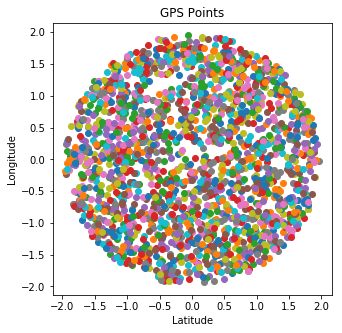

In [9]:
# Affichons les points GPS (cela peut être un peu lent à cause du nombre de points)

plt.figure(figsize=(5,5))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('GPS Points')

for lat, lon in z:
    plt.plot(lat, lon, 'o')
plt.show()

In [10]:
# verification moyenne
print(np.mean(z,axis=0))

[1.81472615e-14 1.49213975e-15]


In [11]:
# verification ecart-type
print(np.std(z,axis=0))

[1. 1.]


In [12]:
# clustering
# min 15 points de données dans un voisinage de rayon 0,5
# cluster les données en cinq clusters 


In [13]:
#https://medium.com/@plog397/functions-to-plot-kmeans-hierarchical-and-dbscan-clustering-c4146ed69744


In [26]:
# metrique = distance euclidienne
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    
    plt.figure(figsize=(10,10))
    
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    plt.xlabel ("x=lattitude") 
    plt.ylabel ("y=longitude")

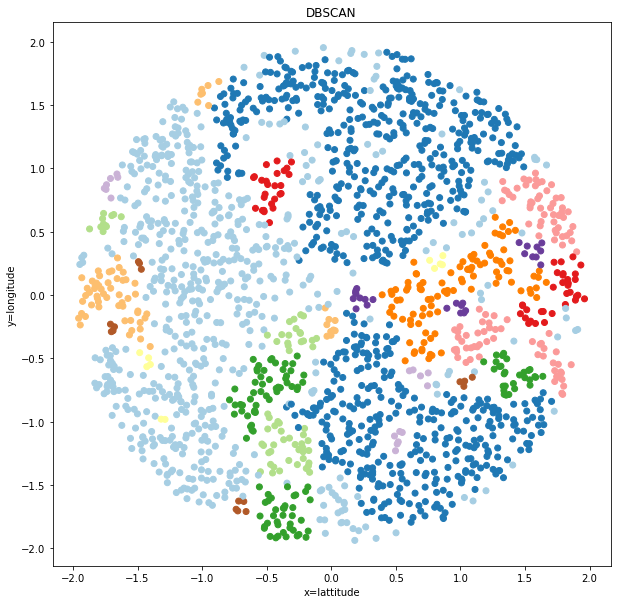

In [27]:
dbscan(gps, eps=.1, min_samples=5)

In [31]:
# metrique = autre metrique
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    
    plt.figure(figsize=(10,10))
    
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    plt.xlabel ("x=lattitude") 
    plt.ylabel ("y=longitude")
    
    
#dbscan(gps, eps=.1, min_samples=5)

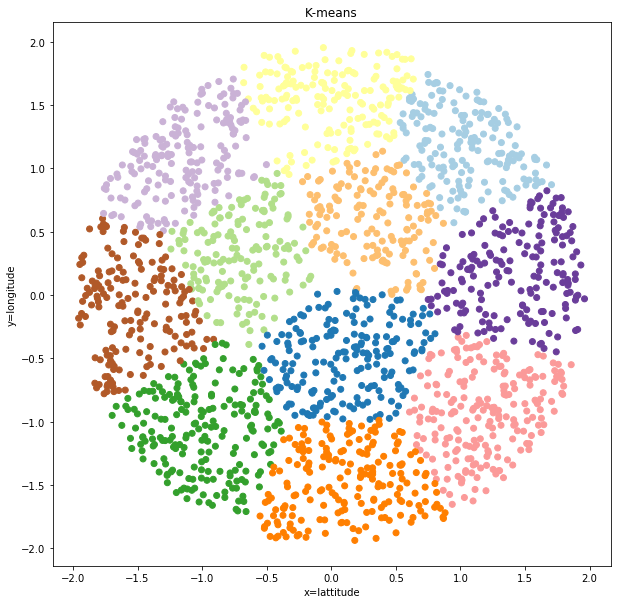

In [29]:
# KMeans Clustering
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    
    plt.figure(figsize=(10,10))
    
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("K-means")
    plt.xlabel ("x=lattitude") 
    plt.ylabel ("y=longitude")
    
kmeans(gps, 11)

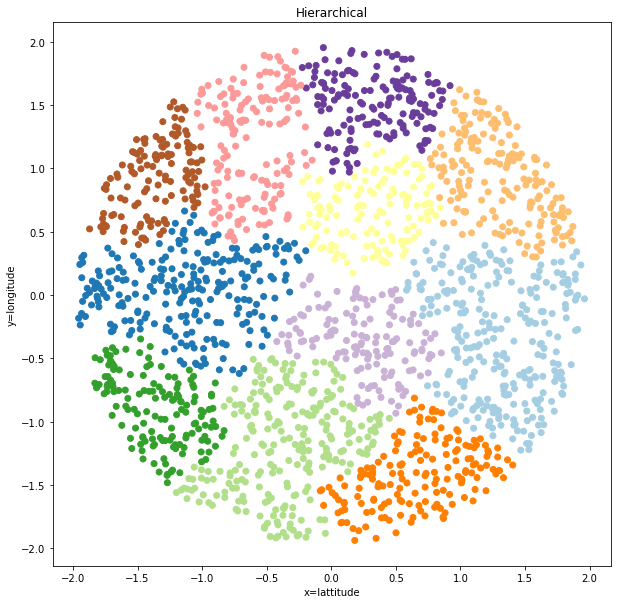

In [30]:
# CAH
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    
    plt.figure(figsize=(10,10))
    
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")
    plt.xlabel ("x=lattitude") 
    plt.ylabel ("y=longitude")

hier(gps, 11)

In [19]:
# a travailler
# https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea

In [20]:
# https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

In [21]:
# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [22]:
# ACP + CAH

In [23]:
# analyse avec R

In [24]:
#https://www.datacamp.com/community/tutorials/k-means-clustering-python

## Clustering des points GPS

Scikit-learn implémente déjà un certain nombre d'algorithmes de clustering: http://scikit-learn.org/stable/modules/clustering.html#clustering

Vous pouvez commencer ce TP en testant les différents algorithmes de clustering de scikit-learn sur votre jeu de données. Bien que nous vous dirigeons vers cette ressource que nous jugeons utile vous pouvez tout à fait décider d'utiliser d'autres ressources voire de coder un algorithme directement par vous-même.

**Note**: Certains algorithmes de scikit-learn acceptent que la méthode utilisée pour le calcul de la distance soit précisée ou fournie au travers d'une fonction. 

Bien que la distance euclidienne fonctionne bien dans notre cas car nous travaillions dans un plan en 2 dimensions, il peut être intéressant de pouvoir avoir la distance entre deux points GPS exprimée en mètres. C'est ce que permet la formule de *haversine*: https://fr.wikipedia.org/wiki/Formule_de_haversine . 

In [25]:
def haversine_distance(origin, destination):
    """Return the distance between two GPS points in meters"""
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371e3 # Radius of earth in meters

    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = radius * c

    return d